In [1]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import winprobabilitypbp
from nba_api.stats.endpoints import boxscoreusagev2
from nba_api.stats.endpoints import boxscorescoringv2
from nba_api.stats.endpoints import boxscoreadvancedv2
from nba_api.stats.endpoints import infographicfanduelplayer
from nba_api.stats.endpoints import boxscoreplayertrackv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib.style as style
style.use('fivethirtyeight')
pd.set_option('display.max_colwidth',250)
pd.set_option('display.max_columns', None)

# Inspiration

On March 24, 2017, 18,624 fans at the Garden and many more at home got to see a 20 year old Devin Booker light up the Garden for 70 points -- a mark that has been reached by 2 other players. Those other two are David Robinson and Kobe Bryant, both of which are revered as all-time greats. The other two teams were able to pull off wins with their great efforts, but Booker fell short. And that really is the narrative surrounding Booker for the past 3/4 years. 

I wanted to take a look at players who have put up 60+ games, their teams, and their outcomes

In [2]:
game = leaguegamefinder.LeagueGameFinder(player_or_team_abbreviation = "P", league_id_nullable = "00", \
                                        gt_pts_nullable = "60", season_type_nullable = "Regular Season")
df = game.get_data_frames()[0]
df['TEAM_ABBREVIATION'] = df.TEAM_ABBREVIATION.str.replace("UTH", "UTA")
df['TEAM_ABBREVIATION'] = df.TEAM_ABBREVIATION.str.replace('SAN', "SAS")
df

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021801084,2019-03-22,HOU vs. SAS,W,37,61,19,34,0.559,9,13,0.692,14,17,0.824,2,5,7,1,3,0,3,3,18.0
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,2019-01-23,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0
2,22018,202689,Kemba Walker,1610612766,CHA,Charlotte Hornets,0021800225,2018-11-17,CHA vs. PHI,L,45,60,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,4,0,9,2,1.0
3,22017,201935,James Harden,1610612745,HOU,Houston Rockets,0021700748,2018-01-30,HOU vs. ORL,W,46,60,19,30,0.633,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,7.0
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,2017-03-24,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0
5,22016,202691,Klay Thompson,1610612744,GSW,Golden State Warriors,0021600314,2016-12-05,GSW vs. IND,W,29,60,21,33,0.636,8,14,0.571,10,11,0.909,0,2,2,1,0,0,0,0,37.0
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,2016-04-13,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0
7,22013,2544,LeBron James,1610612748,MIA,Miami Heat,0021300893,2014-03-03,MIA vs. CHA,W,41,61,22,33,0.667,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,16.0
8,22013,2546,Carmelo Anthony,1610612752,NYK,New York Knicks,0021300640,2014-01-24,NYK vs. CHA,W,39,62,23,35,0.657,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,34.0
9,22008,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020800709,2009-02-02,LAL @ NYK,W,37,61,19,31,0.613,3,6,0.500,20,20,1.000,0,0,0,3,0,1,2,1,19.0


In [3]:
df['YEAR'] = df['GAME_DATE'].str.replace("-", "")
df['YEAR'] = df['YEAR'].astype(int)

In [4]:
import math
df['YEAR'] = df.YEAR.apply(lambda d: d // 10 ** (int(math.log(d, 10))-3))
df['YEAR'] = df['YEAR'].astype(str)
df['YEAR'] = df['PLAYER_NAME'] + "'" + df['YEAR'].str[2:]
df['GAME_DATE'] = df['GAME_DATE'].str.replace("-", "")
df['GAME_DATE'] = df['GAME_DATE'].astype(int)
df

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR
0,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021801084,20190322,HOU vs. SAS,W,37,61,19,34,0.559,9,13,0.692,14,17,0.824,2,5,7,1,3,0,3,3,18.0,James Harden'19
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,20190123,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0,James Harden'19
2,22018,202689,Kemba Walker,1610612766,CHA,Charlotte Hornets,0021800225,20181117,CHA vs. PHI,L,45,60,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,4,0,9,2,1.0,Kemba Walker'18
3,22017,201935,James Harden,1610612745,HOU,Houston Rockets,0021700748,20180130,HOU vs. ORL,W,46,60,19,30,0.633,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,7.0,James Harden'18
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17
5,22016,202691,Klay Thompson,1610612744,GSW,Golden State Warriors,0021600314,20161205,GSW vs. IND,W,29,60,21,33,0.636,8,14,0.571,10,11,0.909,0,2,2,1,0,0,0,0,37.0,Klay Thompson'16
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,20160413,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0,Kobe Bryant'16
7,22013,2544,LeBron James,1610612748,MIA,Miami Heat,0021300893,20140303,MIA vs. CHA,W,41,61,22,33,0.667,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,16.0,LeBron James'14
8,22013,2546,Carmelo Anthony,1610612752,NYK,New York Knicks,0021300640,20140124,NYK vs. CHA,W,39,62,23,35,0.657,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,34.0,Carmelo Anthony'14
9,22008,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020800709,20090202,LAL @ NYK,W,37,61,19,31,0.613,3,6,0.500,20,20,1.000,0,0,0,3,0,1,2,1,19.0,Kobe Bryant'09


# Win/Loss Stats

In [5]:
Players = df.PLAYER_NAME.value_counts()
Players

Kobe Bryant         6
Michael Jordan      4
James Harden        3
Karl Malone         1
Larry Bird          1
Klay Thompson       1
Allen Iverson       1
Kemba Walker        1
Gilbert Arenas      1
Shaquille O'Neal    1
Devin Booker        1
Tom Chambers        1
Tracy McGrady       1
David Robinson      1
LeBron James        1
Bernard King        1
Carmelo Anthony     1
Name: PLAYER_NAME, dtype: int64

In [6]:
Dubs = df.WL.value_counts()
WinPct = Dubs[0] / len(df)
WinPct

0.8148148148148148

In [7]:
WinLossRatio = Dubs[0]/Dubs[1]
WinLossRatio

4.4

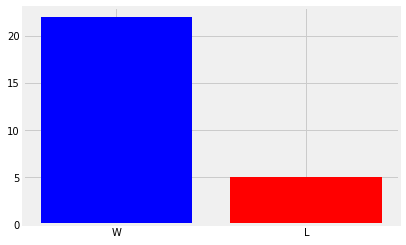

In [8]:
x = np.arange(2)
plt.bar(x, df.WL.value_counts(), color = ['blue', 'red'])
plt.xticks(x, ['W', 'L'])
plt.show()

It isn't too surprising to see Devin Booker is in the minority here. Since the 1983-84 season, there have been 27 games where a player has scored 60+ points. The winning team has won 22 of the 27 games for a win ratio of 4.4:1 and a winning percentage of 81%. 

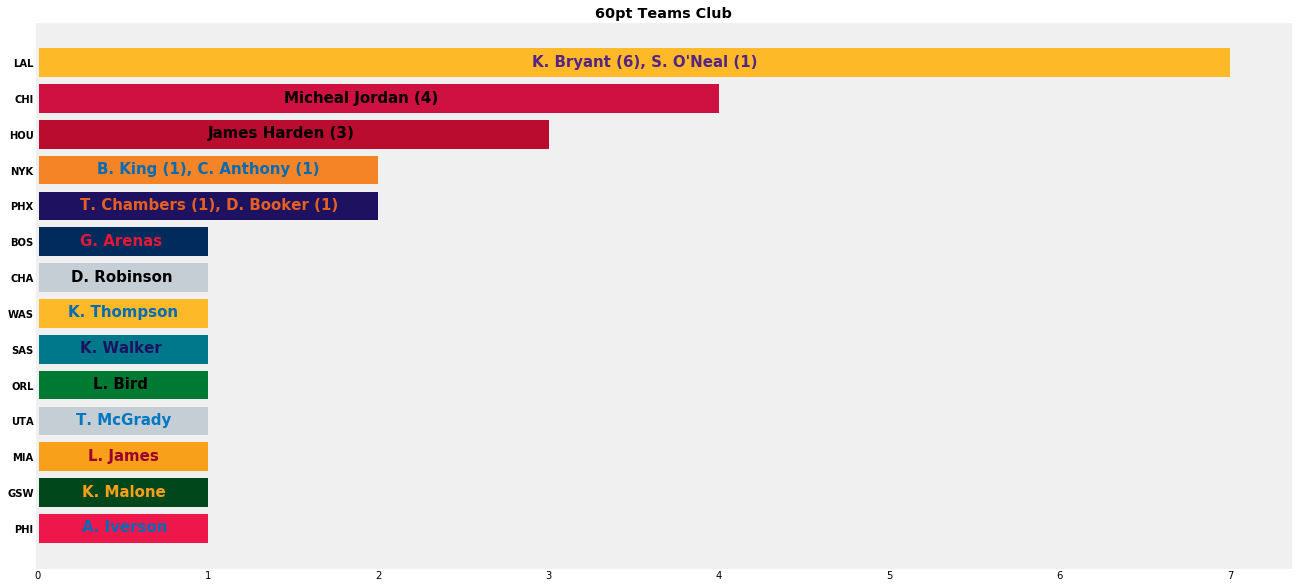

In [41]:
x = np.arange(14)
plt.barh(x, df.TEAM_ABBREVIATION.value_counts(ascending = True), color = ['#ED174C', '#00471B', '#F9A01B', '#C4CED4',\
                                                                           '#007A33', '#00788C', '#FDB927', '#C4CED4',\
                                                                           '#002B5C', '#1D1160', '#F58426', '#BA0C2F',\
                                                                           '#CE1141', '#FDB927'])
plt.yticks(x, df.TEAM_ABBREVIATION.value_counts(ascending = True).index, weight = 'bold')
plt.text(x = 2.9, y = 12.90, s = "K. Bryant (6), S. O'Neal (1)", color = '#552583', weight = 'bold', fontsize = 15)
plt.text(x = 1.45, y = 11.90, s = "Micheal Jordan (4)", color = '#000000', weight = 'bold', fontsize = 15)
plt.text(x = 1, y = 10.90, s = "James Harden (3)", color = '#000000', weight = 'bold', fontsize = 15)
plt.text(x = .35, y = 9.90, s = "B. King (1), C. Anthony (1)", color = '#006BB6', weight = 'bold', fontsize = 15)
plt.text(x = .25, y = 8.90, s = "T. Chambers (1), D. Booker (1)", color = '#E56020', weight = 'bold', fontsize = 15)
plt.text(x = .25, y = 7.90, s = "G. Arenas", color = '#E31837', weight = 'bold', fontsize = 15)
plt.text(x = .2, y = 6.90, s = "D. Robinson", color = '#000000', weight = 'bold', fontsize = 15)
plt.text(x = .18, y = 5.90, s = "K. Thompson", color = '#006BB6', weight = 'bold', fontsize = 15)
plt.text(x = .25, y = 4.90, s = "K. Walker", color = '#1D1160', weight = 'bold', fontsize = 15)
plt.text(x = .33, y = 3.90, s = "L. Bird", color = '#000000', weight = 'bold', fontsize = 15)
plt.text(x = .23, y = 2.90, s = "T. McGrady", color = '#0077C0', weight = 'bold', fontsize = 15)
plt.text(x = .3, y = 1.90, s = "L. James", color = '#98002E', weight = 'bold', fontsize = 15)
plt.text(x = .26, y = 0.90, s = "K. Malone", color = '#F9A01B', weight = 'bold', fontsize = 15)
plt.text(x = .26, y = -.1, s = "A. Iverson", color = '#006BB6', weight = 'bold', fontsize = 15)
plt.title('60pt Teams Club', weight = 'bold')
plt.grid(b=None)
plt.show()

# Comparison against others

In [10]:
df['z_score_fgpct'] = (df.FG_PCT - df.FG_PCT.mean()) / df.FG_PCT.std()
df['FG3Pt_Pct'] = df.FG3A/df.FGA

In [11]:
print(df.FG_PCT.rank(ascending = False, method = 'min')[4])
df.loc[df.PLAYER_NAME == 'Devin Booker', ['PLAYER_NAME','z_score_fgpct']]

24.0


,PLAYER_NAME,z_score_fgpct
4,Devin Booker,-0.878703


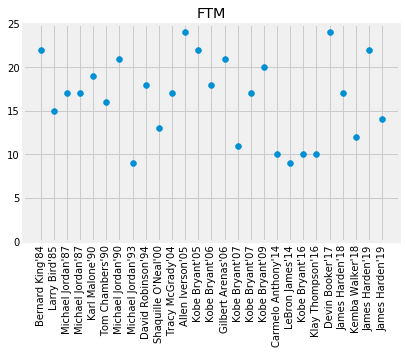

In [12]:
x = np.array(range(len(df)))
y = df.sort_values(by='GAME_DATE').FTM
plt.scatter(x, y)
plt.xticks(x, df.sort_values(by='GAME_DATE').YEAR, rotation = 90)
plt.ylim(0,max(df.FTM)+1)
plt.title("FTM")
plt.show()

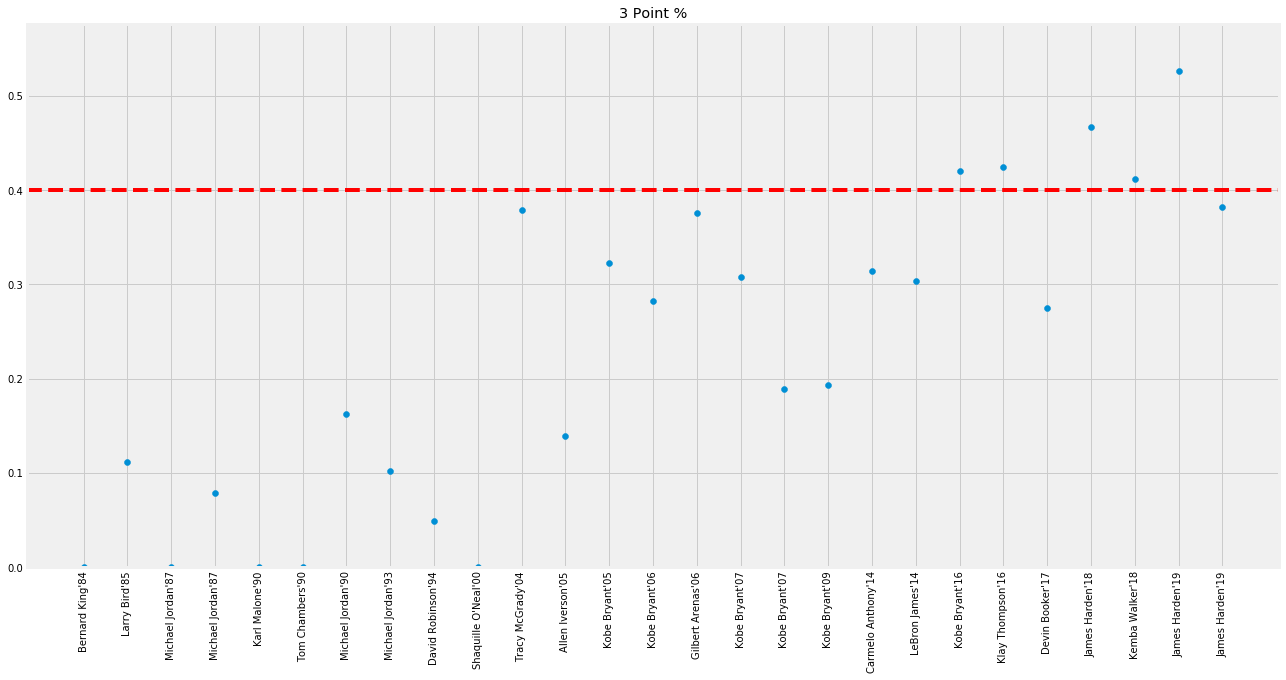

In [49]:
x = np.array(range(len(df)))
y = df.sort_values(by='GAME_DATE').FG3Pt_Pct
plt.scatter(x, y)
plt.xticks(x, df.sort_values(by='GAME_DATE').YEAR, rotation = 90)
plt.ylim(0,max(df.FG3Pt_Pct)+.05)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.title("3 Point %")
plt.show()

In [14]:
df['FG3Pt_Pct'] = df.FG3A/df.FGA
df.loc[:, ['PLAYER_NAME','3Pt_Pct']]
print(df.FG3Pt_Pct.rank()[4])
df.loc[df.PLAYER_NAME == 'Devin Booker', ['PLAYER_NAME','FG3Pt_Pct']]

14.0


/Users/quilviohernandez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,PLAYER_NAME,FG3Pt_Pct
4,Devin Booker,0.275


In [15]:
print(df.FTM.min())
df.sort_values(by='FTM', ascending = False).head(5)

9


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR,z_score_fgpct,FG3Pt_Pct
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17,-0.878703,0.275000
15,22004,947,Allen Iverson,1610612755,PHI,Philadelphia 76ers,0020400742,20050212,PHI vs. ORL,W,42,60,17,36,0.472,2,5,0.400,24,27,0.889,1,3,4,6,5,1,3,1,27.0,Allen Iverson'05,-1.554374,0.138889
26,21984,77264,Bernard King,1610612752,NYK,New York Knicks,0028400327,19841225,NYK vs. NJN,L,41,60,19,30,0.633,0,0,NaN,22,26,0.846,2,5,7,4,0,0,5,2,NaN,Bernard King'84,0.498136,0.000000
14,22005,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020500359,20051220,LAL vs. DAL,W,33,62,18,31,0.581,4,10,0.400,22,25,0.880,3,5,8,0,3,0,2,3,35.0,Kobe Bryant'05,-0.164786,0.322581
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,20190123,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0,James Harden'19,-1.873087,0.526316


In [16]:
print(df.FGA.min())
df.sort_values(by='FGA', ascending = False).head(5)

26


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR,z_score_fgpct,FG3Pt_Pct
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,20160413,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0,Kobe Bryant'16,-1.962326,0.420000
19,21992,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0029200453,19930116,CHI vs. ORL,L,47,64,27,49,0.551,1,5,0.200,9,11,0.818,4,2,6,1,5,0,2,5,NaN,Michael Jordan'93,-0.547242,0.102041
13,22005,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0020500591,20060122,LAL vs. TOR,W,42,81,28,46,0.609,7,13,0.538,18,20,0.900,2,4,6,2,3,1,3,1,25.0,Kobe Bryant'06,0.192172,0.282609
18,21993,764,David Robinson,1610612759,SAS,San Antonio Spurs,0029301097,19940424,SAN @ LAC,W,44,71,26,41,0.634,1,2,0.500,18,25,0.720,4,10,14,5,0,2,8,2,NaN,David Robinson'94,0.510885,0.048780
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17,-0.878703,0.275000


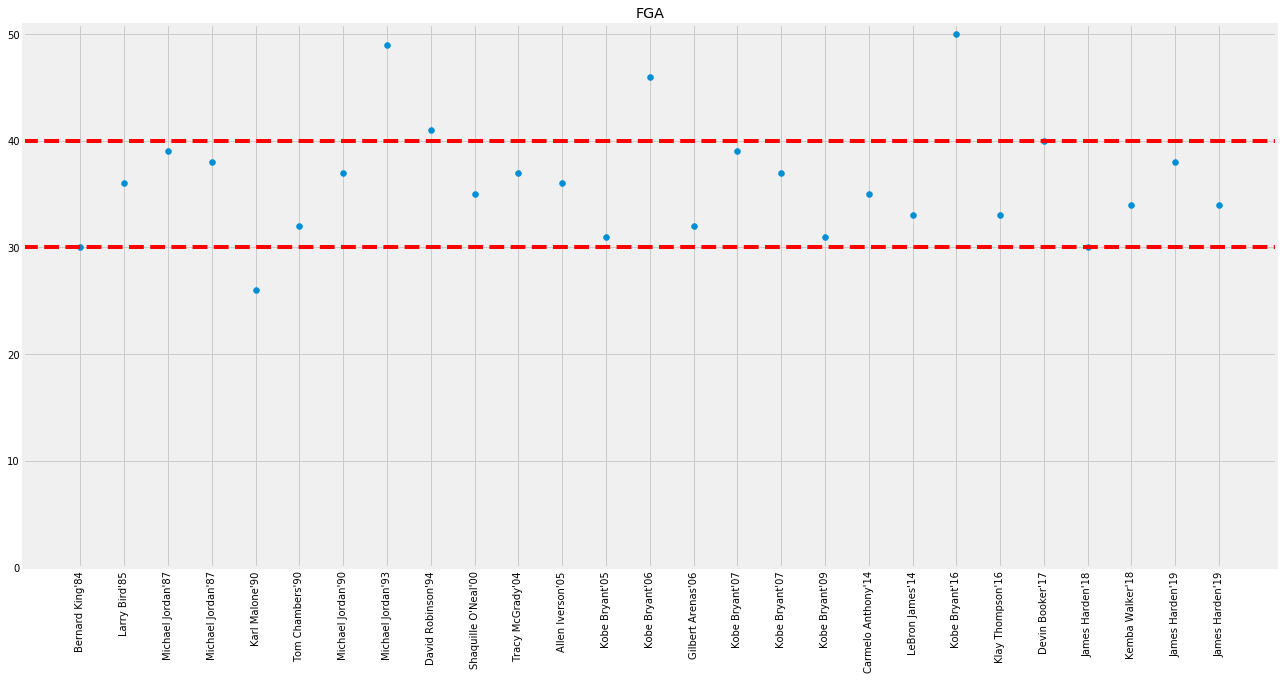

In [43]:
x = np.array(range(len(df)))
y = df.sort_values(by='GAME_DATE').FGA
plt.scatter(x, y)
plt.xticks(x, df.sort_values(by='GAME_DATE').YEAR, rotation = 90)
plt.ylim(0,max(df.FGA)+1)
plt.title("FGA")
plt.axhline(y=30, color='r', linestyle='--')
plt.axhline(y=40, color='r', linestyle='--')
plt.show()

In [18]:
print(df.FG_PCT.min())
df.sort_values(by='FG_PCT').head(5)

0.44


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR,z_score_fgpct,FG3Pt_Pct
6,22015,977,Kobe Bryant,1610612747,LAL,Los Angeles Lakers,0021501228,20160413,LAL vs. UTA,W,42,60,22,50,0.440,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,7.0,Kobe Bryant'16,-1.962326,0.420000
1,22018,201935,James Harden,1610612745,HOU,Houston Rockets,0021800710,20190123,HOU @ NYK,W,40,61,17,38,0.447,5,20,0.250,22,25,0.880,6,9,15,4,5,0,5,3,19.0,James Harden'19,-1.873087,0.526316
15,22004,947,Allen Iverson,1610612755,PHI,Philadelphia 76ers,0020400742,20050212,PHI vs. ORL,W,42,60,17,36,0.472,2,5,0.400,24,27,0.889,1,3,4,6,5,1,3,1,27.0,Allen Iverson'05,-1.554374,0.138889
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17,-0.878703,0.275000
12,22006,2240,Gilbert Arenas,1610612764,WAS,Washington Wizards,0020600355,20061217,WAS @ LAL,W,49,60,17,32,0.531,5,12,0.417,21,27,0.778,0,8,8,8,2,0,3,3,10.0,Gilbert Arenas'06,-0.802212,0.375000


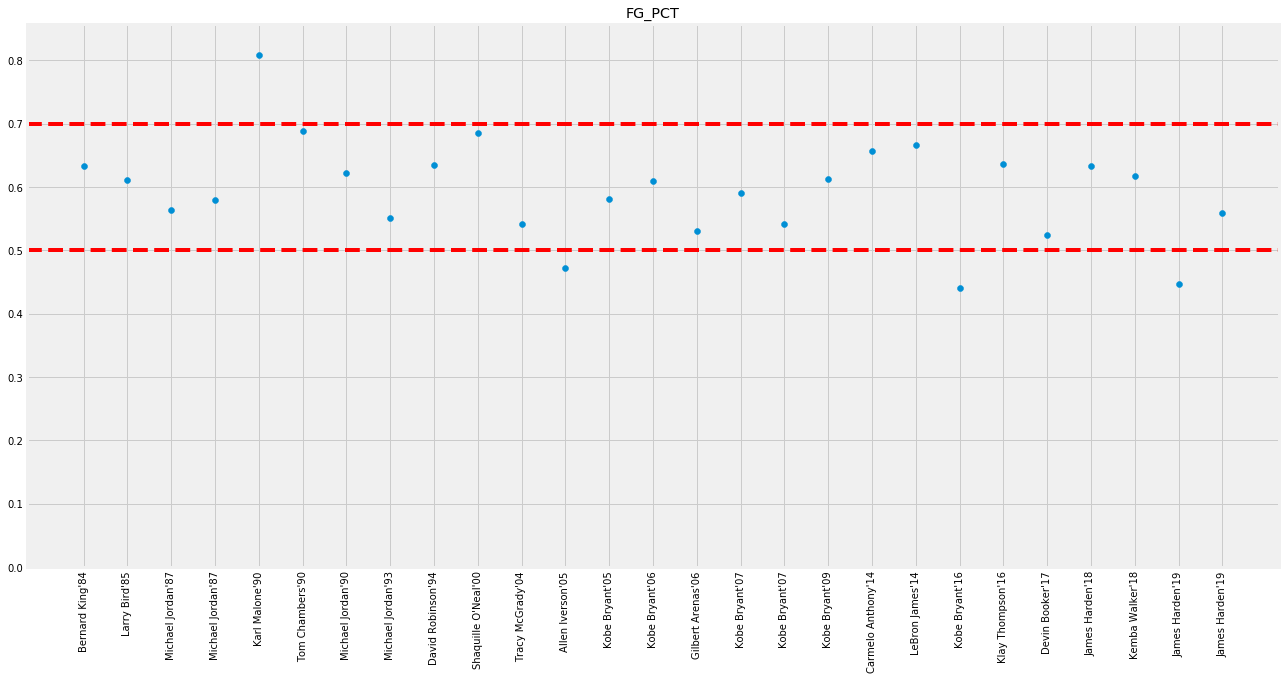

In [48]:
x = np.array(range(len(df)))
y = df.sort_values(by='GAME_DATE').FG_PCT
plt.scatter(x, y)
plt.xticks(x, df.sort_values(by='GAME_DATE').YEAR, rotation = 90)
plt.ylim(0,max(df.FG_PCT)+.05)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.title("FG_PCT")
plt.show()

In [19]:
df.loc[df.PLUS_MINUS < 0]

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR,z_score_fgpct,FG3Pt_Pct
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17,-0.878703,0.275


# Comparison against other losing teams

In [20]:
losers = df.loc[df.WL == 'L']
loser_gameids = losers.GAME_ID.tolist()
losers_player_list = losers.PLAYER_NAME.tolist()
losers

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,YEAR,z_score_fgpct,FG3Pt_Pct
2,22018,202689,Kemba Walker,1610612766,CHA,Charlotte Hornets,0021800225,20181117,CHA vs. PHI,L,45,60,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,4,0,9,2,1.0,Kemba Walker'18,0.306909,0.411765
4,22016,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,0021601076,20170324,PHX @ BOS,L,45,70,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,-6.0,Devin Booker'17,-0.878703,0.275000
19,21992,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0029200453,19930116,CHI vs. ORL,L,47,64,27,49,0.551,1,5,0.200,9,11,0.818,4,2,6,1,5,0,2,5,NaN,Michael Jordan'93,-0.547242,0.102041
23,21986,893,Michael Jordan,1610612741,CHI,Chicago Bulls,0028600921,19870416,CHI vs. ATL,L,41,61,22,38,0.579,0,3,0.000,17,21,0.810,5,5,10,1,4,1,3,3,NaN,Michael Jordan'87,-0.190283,0.078947
26,21984,77264,Bernard King,1610612752,NYK,New York Knicks,0028400327,19841225,NYK vs. NJN,L,41,60,19,30,0.633,0,0,NaN,22,26,0.846,2,5,7,4,0,0,5,2,NaN,Bernard King'84,0.498136,0.000000


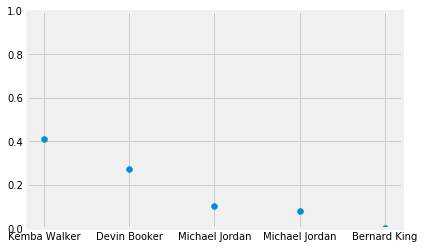

In [21]:
x = np.array(range(len(losers)))
y = losers.FG3Pt_Pct
plt.scatter(x, y)
plt.xticks(x, losers.PLAYER_NAME)
plt.ylim(0,1)
plt.show()

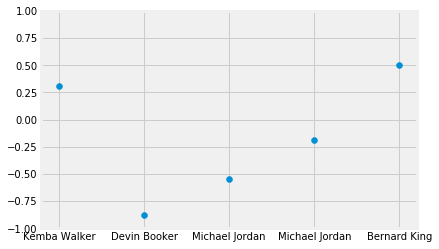

In [22]:
x = np.array(range(len(losers)))
y = losers.z_score_fgpct
plt.scatter(x, y)
plt.xticks(x, losers.PLAYER_NAME)
plt.ylim(-1,1)
plt.show()

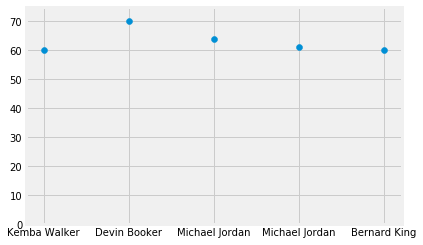

In [23]:
x = np.array(range(len(losers)))
y = losers.PTS
plt.scatter(x, y)
plt.xticks(x, losers.PLAYER_NAME)
plt.ylim(0, 75)
plt.show()

In [24]:
losers_player_list = losers.PLAYER_NAME.tolist()
loser_gameids = losers.GAME_ID.tolist()
print(losers_player_list)
print(loser_gameids)

['Kemba Walker', 'Devin Booker', 'Michael Jordan', 'Michael Jordan', 'Bernard King']
['0021800225', '0021601076', '0029200453', '0028600921', '0028400327']


In [25]:
walker_winprob = winprobabilitypbp.WinProbabilityPBP(game_id=loser_gameids[0])
walker_winprob_df = walker_winprob.get_data_frames()[0]
walker_winprob_df.drop_duplicates(subset = 'SECONDS_REMAINING', keep = 'first', inplace = True)

booker_winprob = winprobabilitypbp.WinProbabilityPBP(game_id=loser_gameids[1])
booker_winprob_df = booker_winprob.get_data_frames()[0]
booker_winprob_df.drop_duplicates(subset = 'SECONDS_REMAINING', keep = 'first', inplace = True)

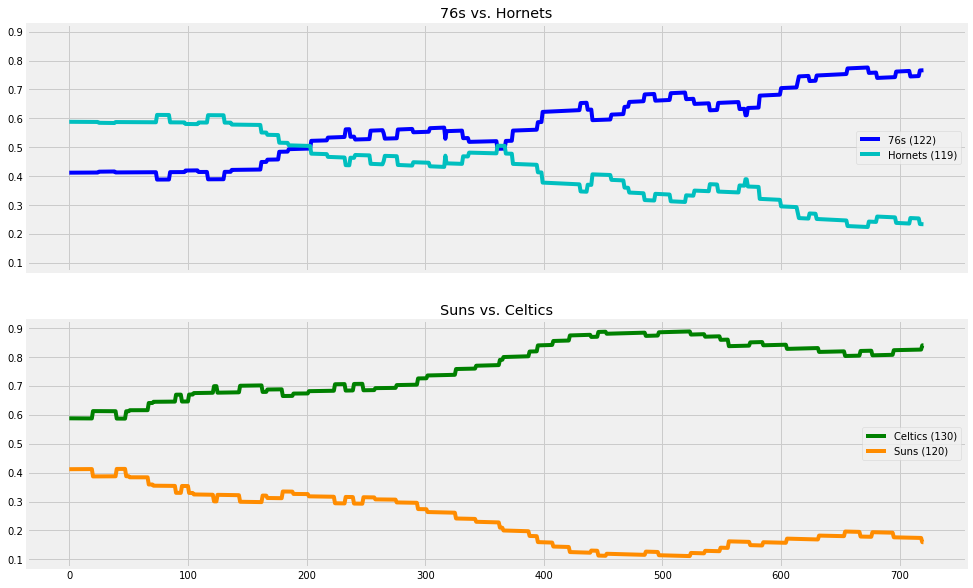

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), sharex = True, sharey = True)

ax1.plot(walker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), walker_winprob_df.VISITOR_PCT, c = 'b', label = '76s (122)')
ax1.plot(walker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), walker_winprob_df.HOME_PCT, c = 'c', label = 'Hornets (119)')
ax1.set_title('76s vs. Hornets')
ax1.legend(loc = 'center right')

ax2.plot(booker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), booker_winprob_df.HOME_PCT, c = 'g', label = 'Celtics (130)')
ax2.plot(booker_winprob_df.SECONDS_REMAINING.sort_values(ascending = True), booker_winprob_df.VISITOR_PCT, c = 'darkorange', label = 'Suns (120)')
ax2.set_title('Suns vs. Celtics')
ax2.legend(loc = 'center right')

plt.show()

The Suns never had a great chance of winning their game while the Hornets actually came into the game as favorites. This is to show that Devin Booker's team falls short in every way.

In [27]:
loser_usage_df = pd.DataFrame()
for i in range(len(loser_gameids)):
    try:
        temp = boxscoreusagev2.BoxScoreUsageV2(game_id=loser_gameids[i])
        temp = temp.get_data_frames()[0]
        temp = temp.loc[temp['PLAYER_NAME'] == losers_player_list[i]]
        loser_usage_df = loser_usage_df.append(temp, sort = False)
    except:
        pass
loser_usage_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,USG_PCT,PCT_FGM,PCT_FGA,PCT_FG3M,PCT_FG3A,PCT_FTM,PCT_FTA,PCT_OREB,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
15,0021800225,1610612766,CHA,Charlotte,202689,Kemba Walker,G,,45:23,0.436,0.538,0.395,0.667,0.500,0.545,0.522,0.0,0.206,0.167,0.190,0.643,0.444,0.000,0.6,0.077,0.500,0.550
3,0021601076,1610612756,PHX,Phoenix,1626164,Devin Booker,G,,44:58,0.480,0.568,0.482,0.667,0.579,0.686,0.553,0.2,0.158,0.167,0.286,0.455,0.375,0.333,0.2,0.103,0.552,0.609


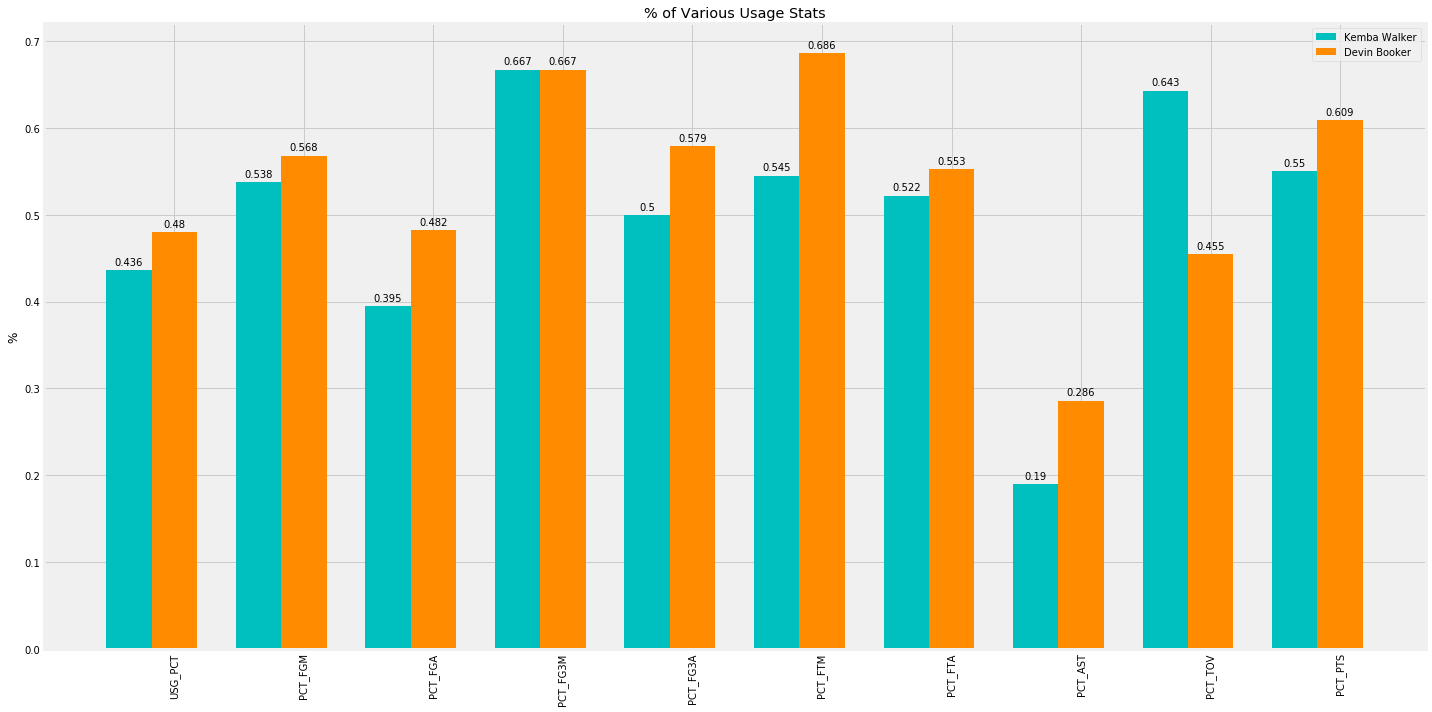

In [28]:
#https://matplotlib.org/3.1.0/gallery/units/bar_unit_demo.html
plt.rcParams["figure.figsize"] = (20,10)

labels = list(loser_usage_df.iloc[:, [9,10,11,12,13,14,15,19,20,26]].columns)
walker_stats = loser_usage_df.iloc[0, [9,10,11,12,13,14,15,19,20,26]].tolist()
booker_stats = loser_usage_df.iloc[1, [9,10,11,12,13,14,15,19,20,26]].tolist()

x = np.arange(len(labels))  # the label locations
width = .35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, walker_stats, width, label='Kemba Walker', align = 'center', color = 'c')
rects2 = ax.bar(x + width/2, booker_stats, width, label='Devin Booker', align = 'center', color = 'darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Various Usage Stats')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=90)
fig.tight_layout()
ax.legend()
ax.autoscale_view()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [29]:
loser_shooting_df = pd.DataFrame()
for i in range(len(loser_gameids)):
    try:
        temp = boxscorescoringv2.BoxScoreScoringV2(game_id=loser_gameids[i])
        temp = temp.get_data_frames()[0]
        temp = temp.loc[temp['PLAYER_NAME'] == losers_player_list[i]]
        loser_shooting_df = loser_shooting_df.append(temp)
    except:
        pass
loser_shooting_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
15,0021800225,1610612766,CHA,Charlotte,202689,Kemba Walker,G,,45:23,0.588,0.412,0.500,0.167,0.300,0.117,0.200,0.033,0.333,0.267,0.733,0.50,0.50,0.333,0.667
3,0021601076,1610612756,PHX,Phoenix,1626164,Devin Booker,G,,44:58,0.725,0.275,0.486,0.229,0.171,0.214,0.343,0.243,0.257,0.353,0.647,0.75,0.25,0.429,0.571


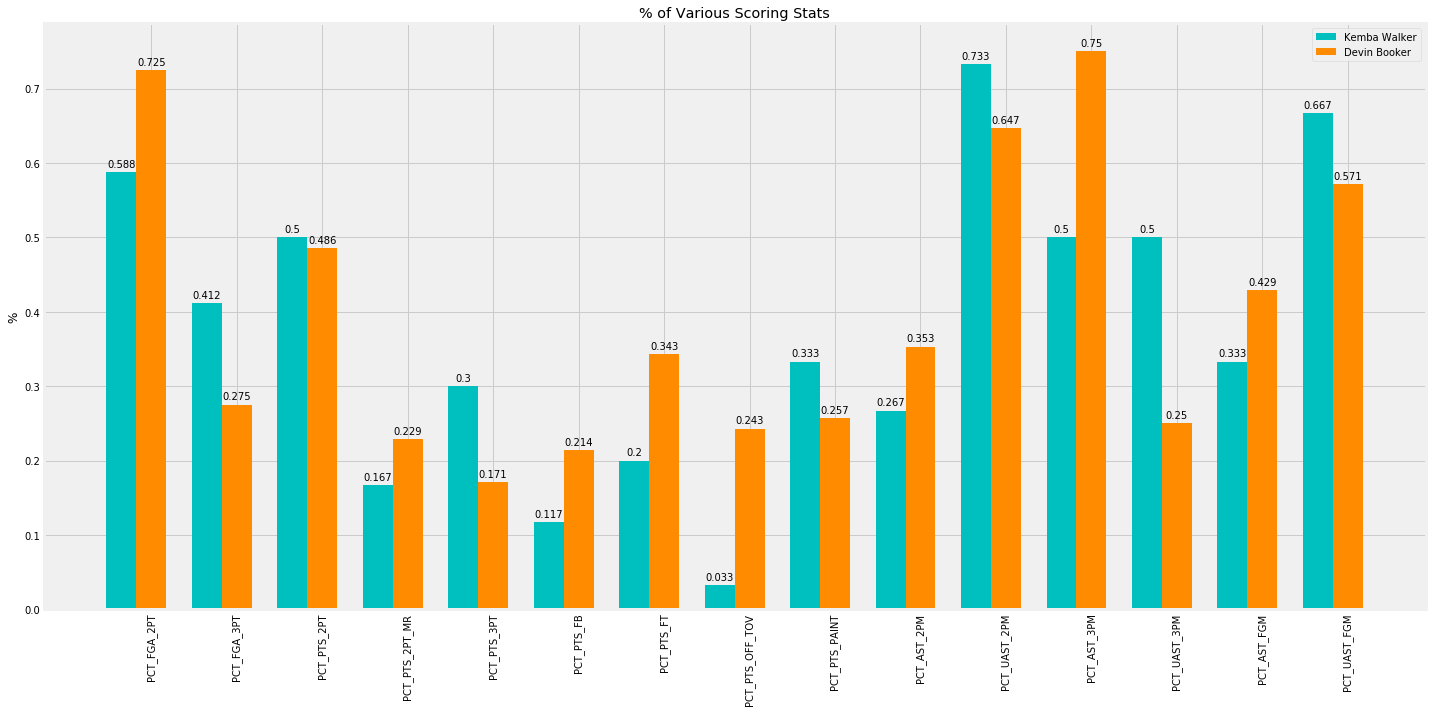

In [30]:
#https://matplotlib.org/3.1.0/gallery/units/bar_unit_demo.html
plt.rcParams["figure.figsize"] = (20,10)

labels = list(loser_shooting_df.iloc[:, 9:].columns)
walker_stats = loser_shooting_df.iloc[0, 9:].tolist()
booker_stats = loser_shooting_df.iloc[1, 9:].tolist()

x = np.arange(len(labels))  # the label locations
width = .35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, walker_stats, width, label='Kemba Walker', align = 'center', color = 'c')
rects2 = ax.bar(x + width/2, booker_stats, width, label='Devin Booker', align = 'center', color = 'darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Various Scoring Stats')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=90)
fig.tight_layout()
ax.legend()
ax.autoscale_view()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

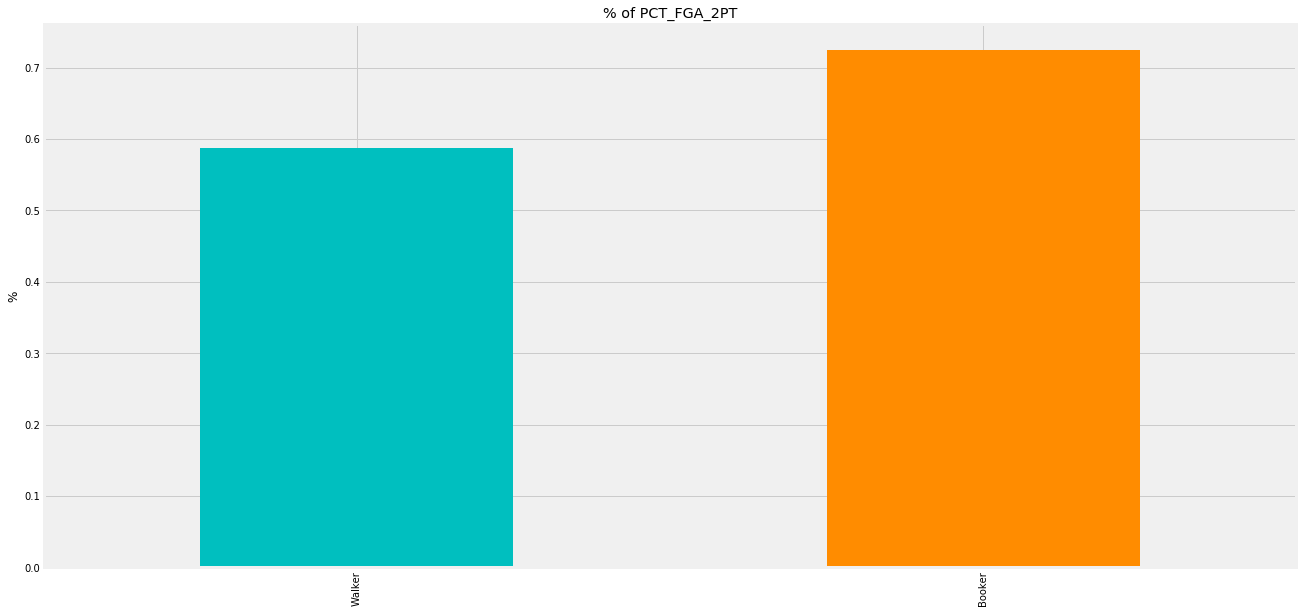

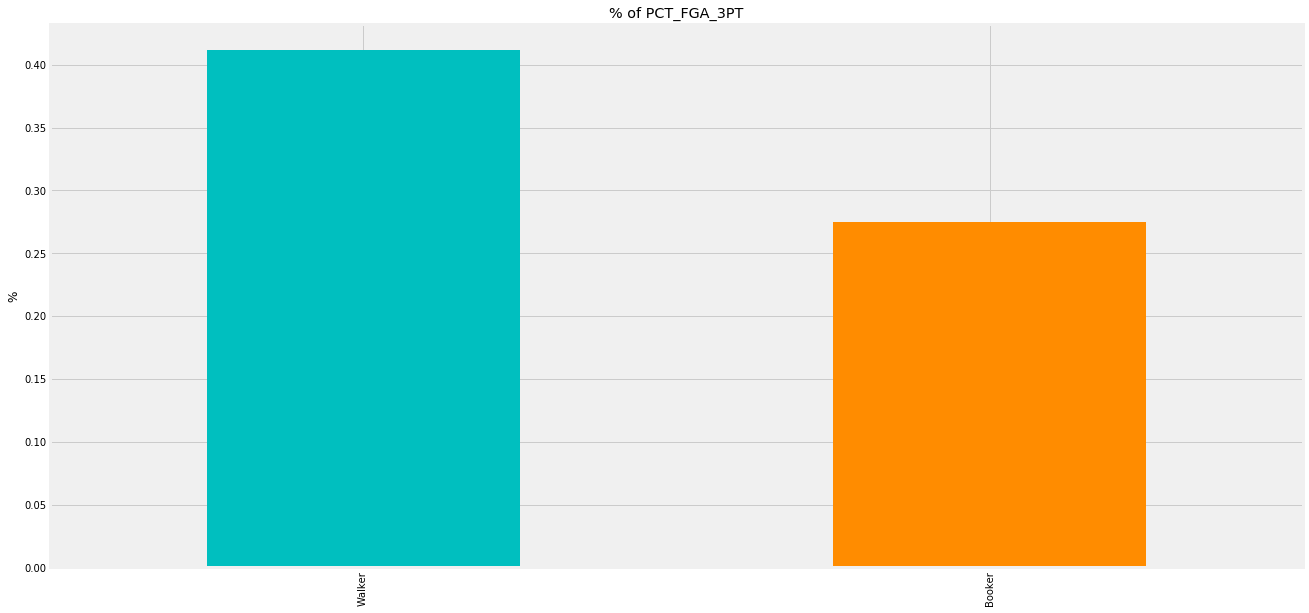

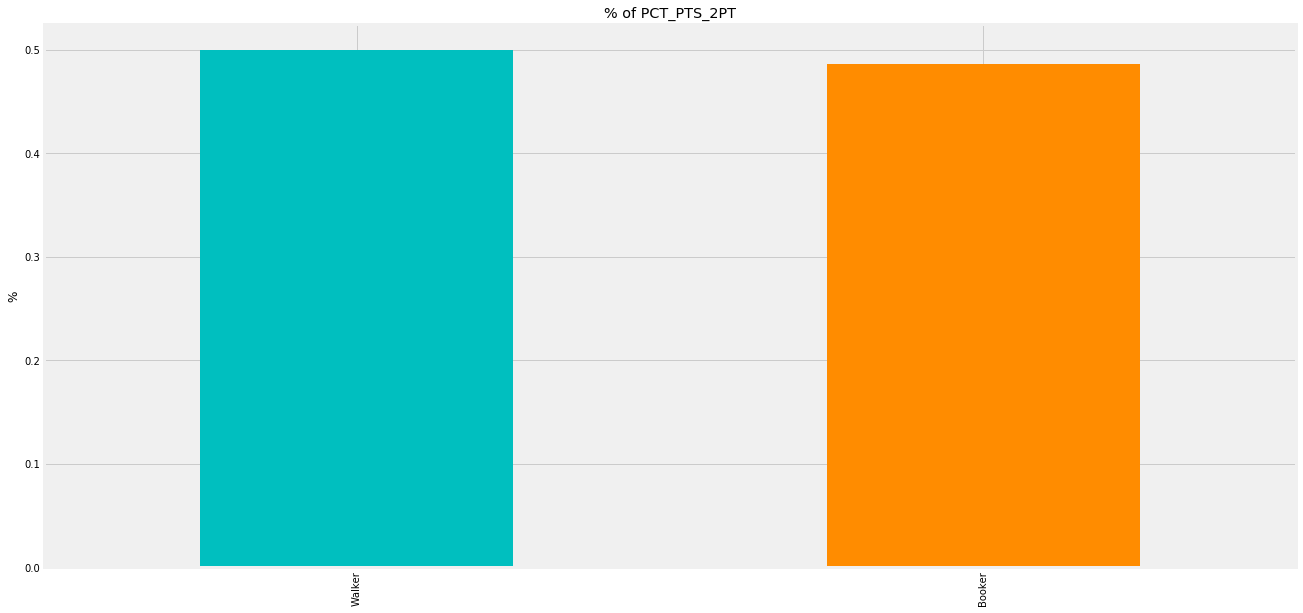

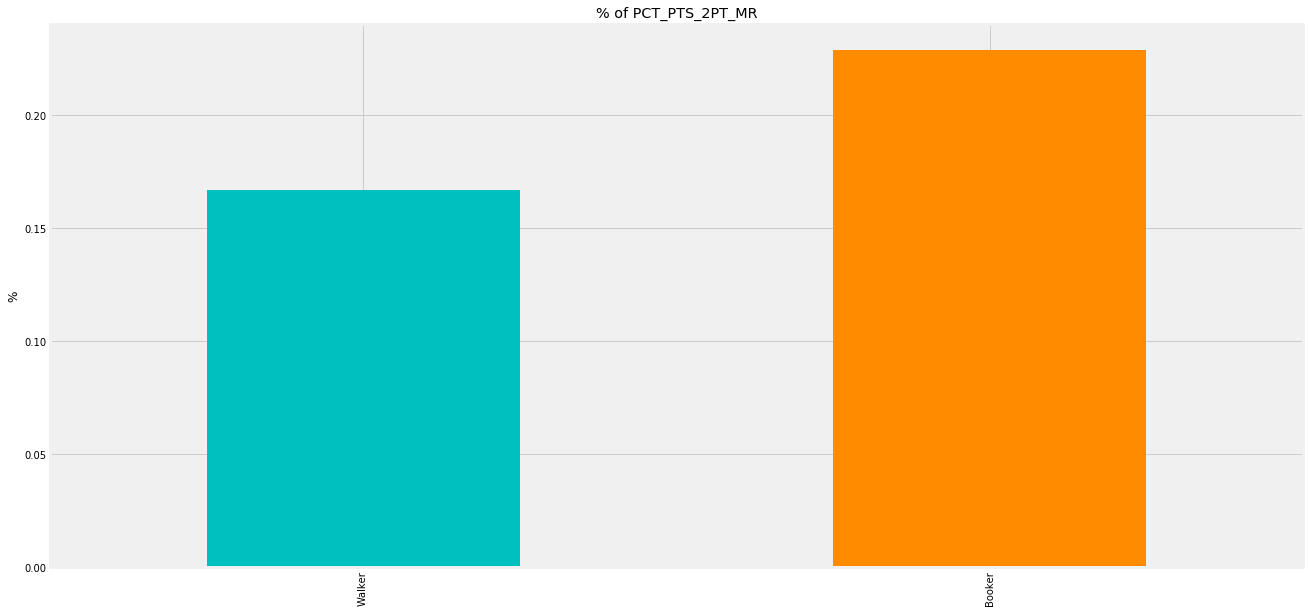

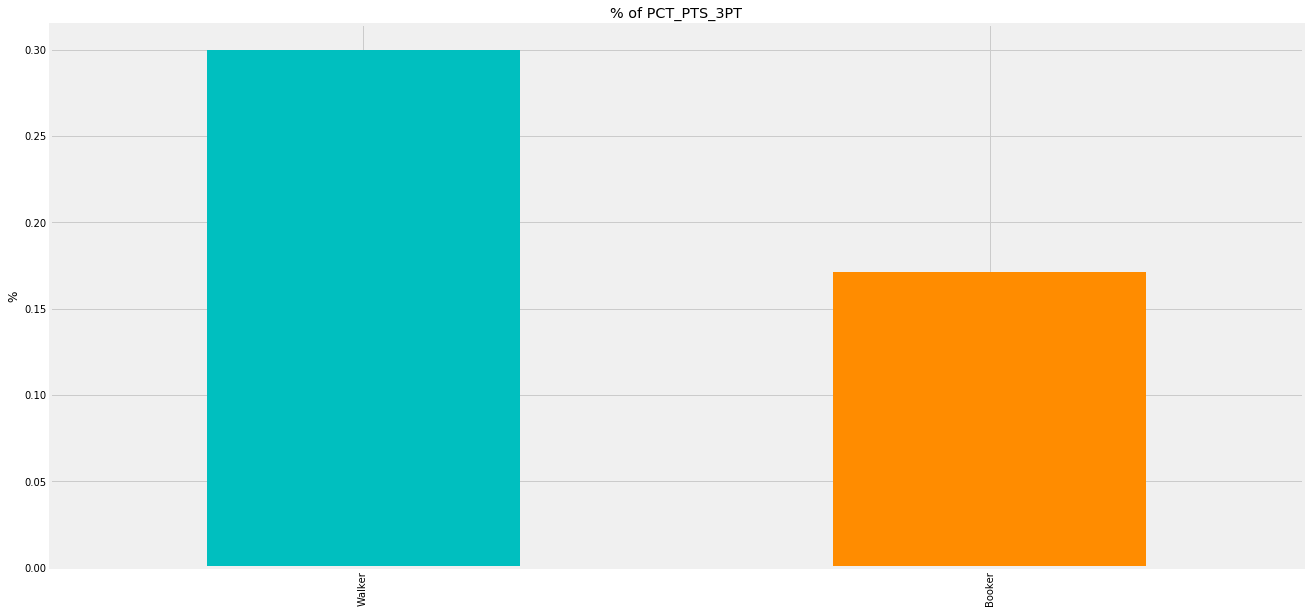

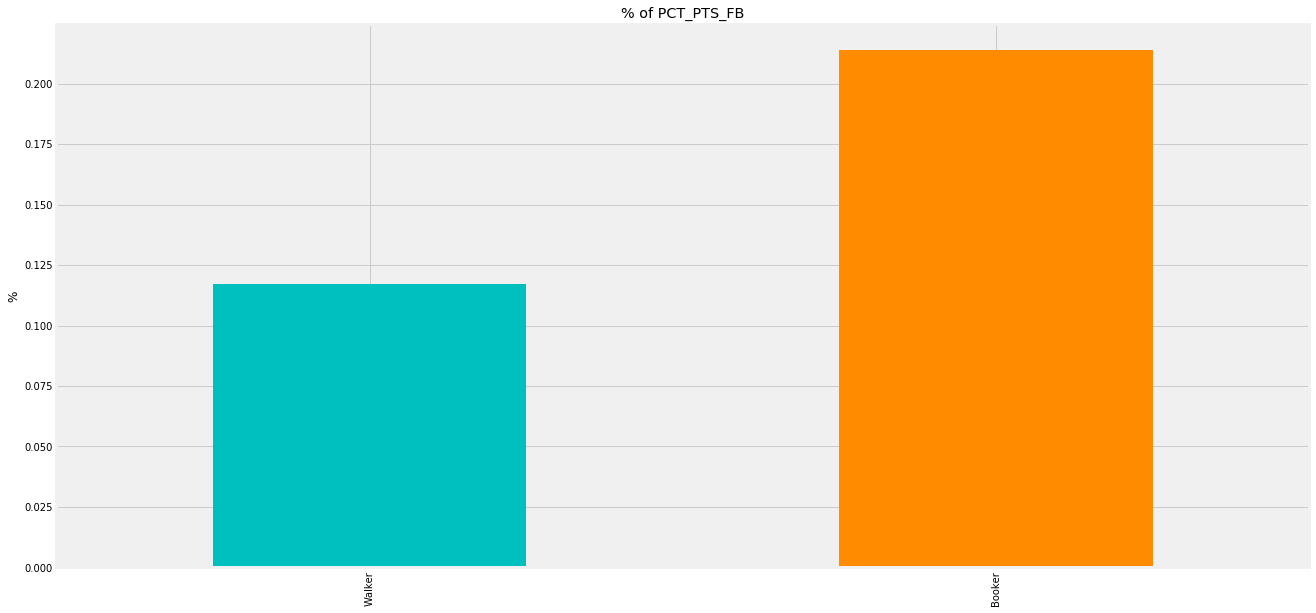

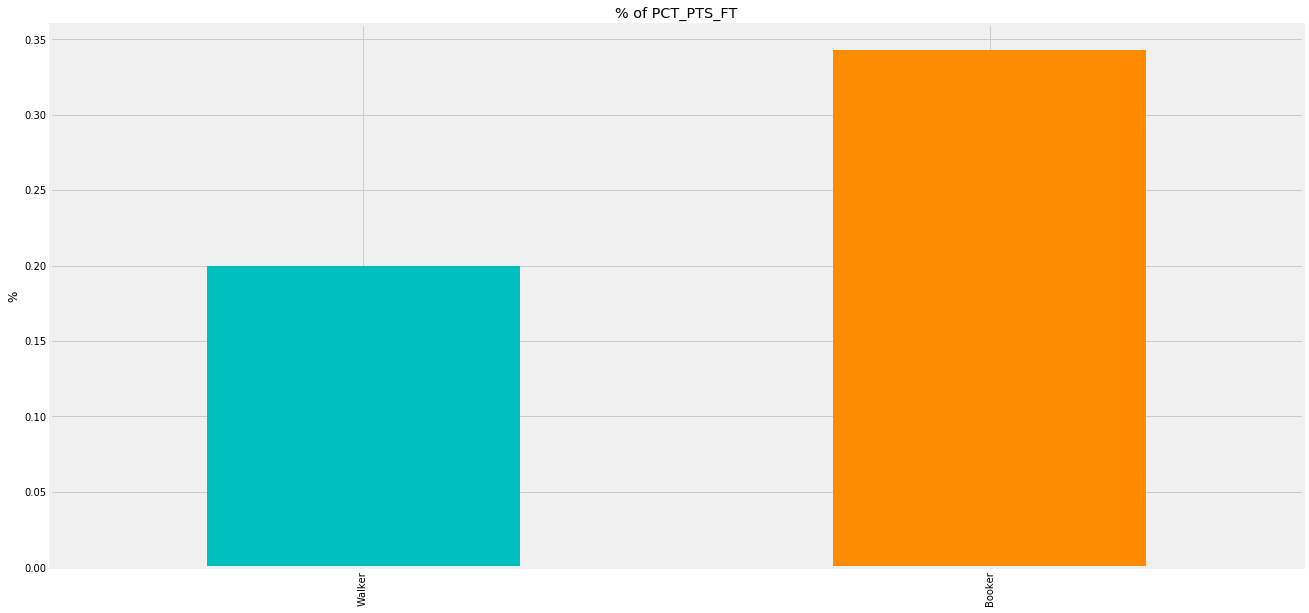

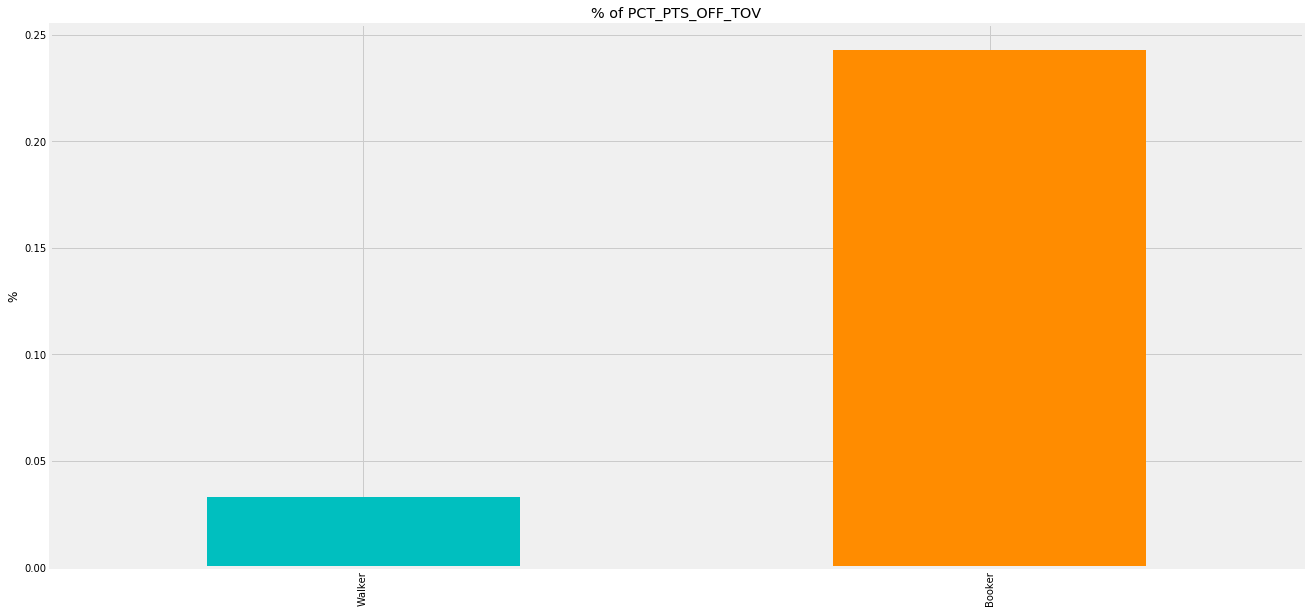

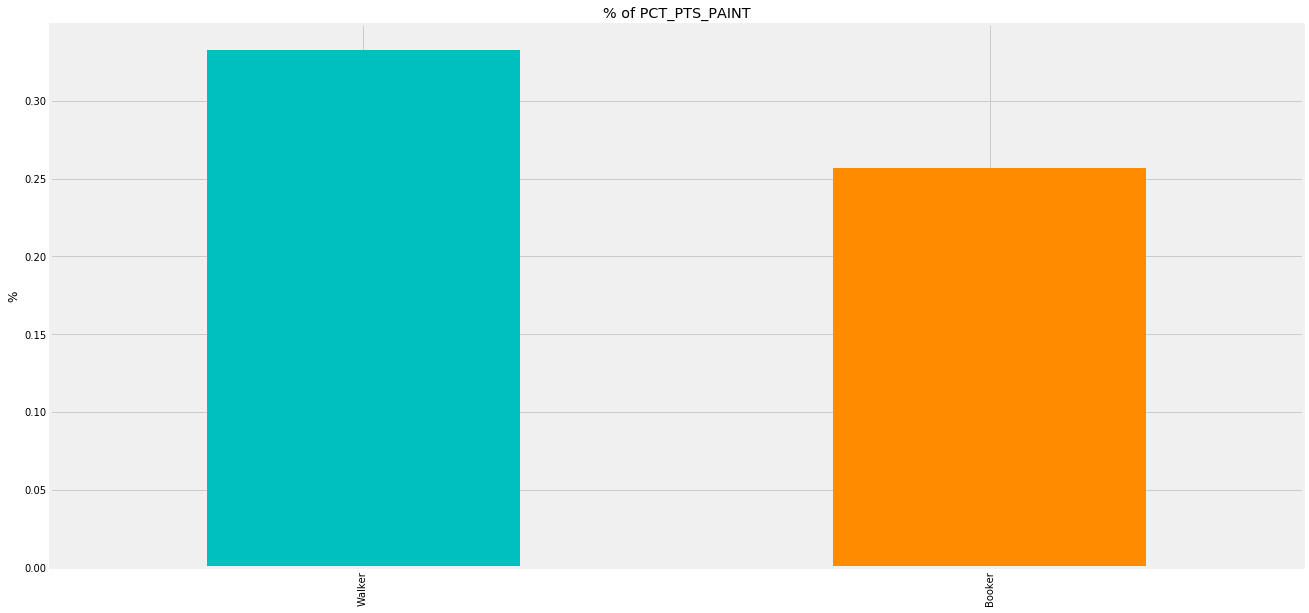

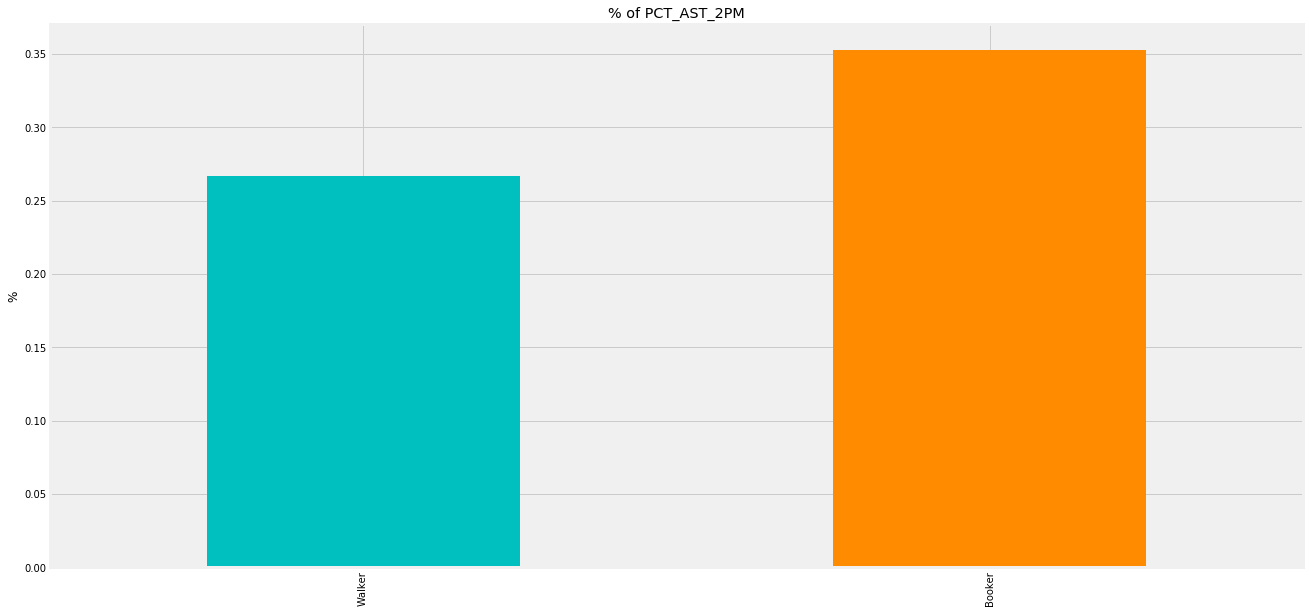

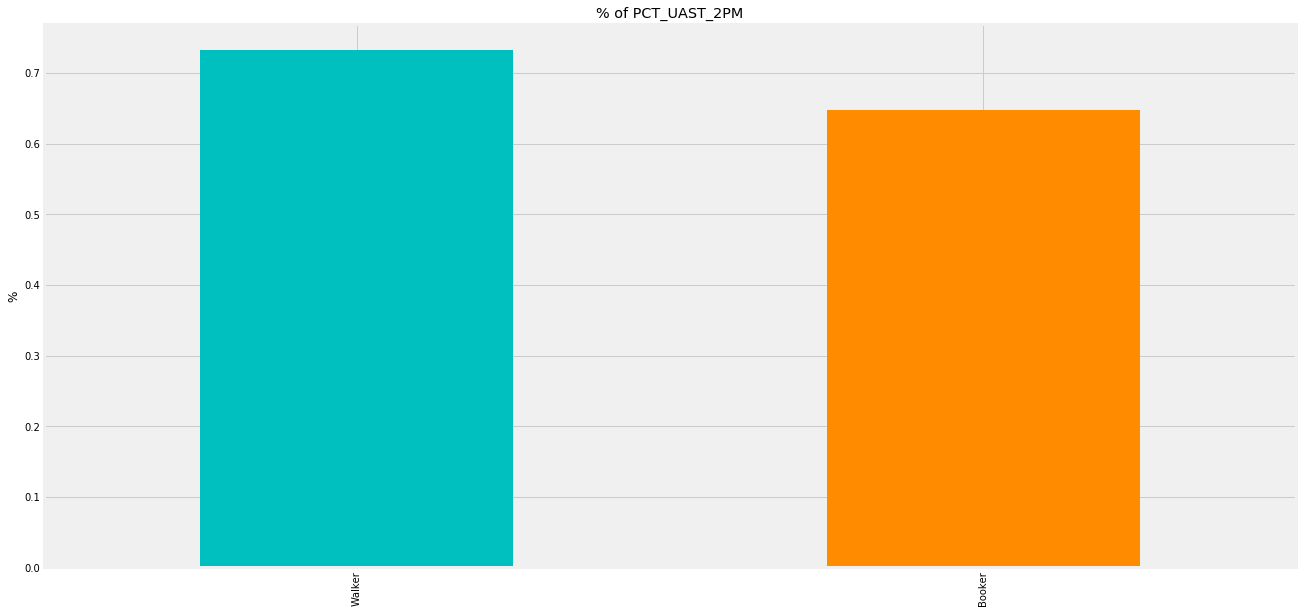

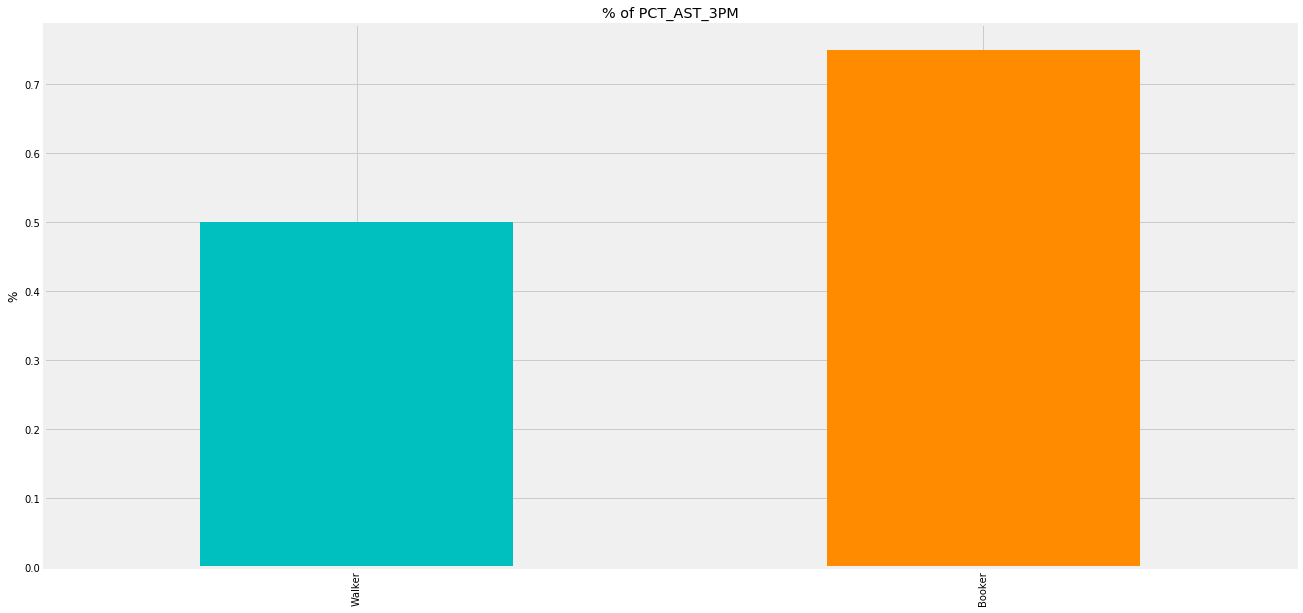

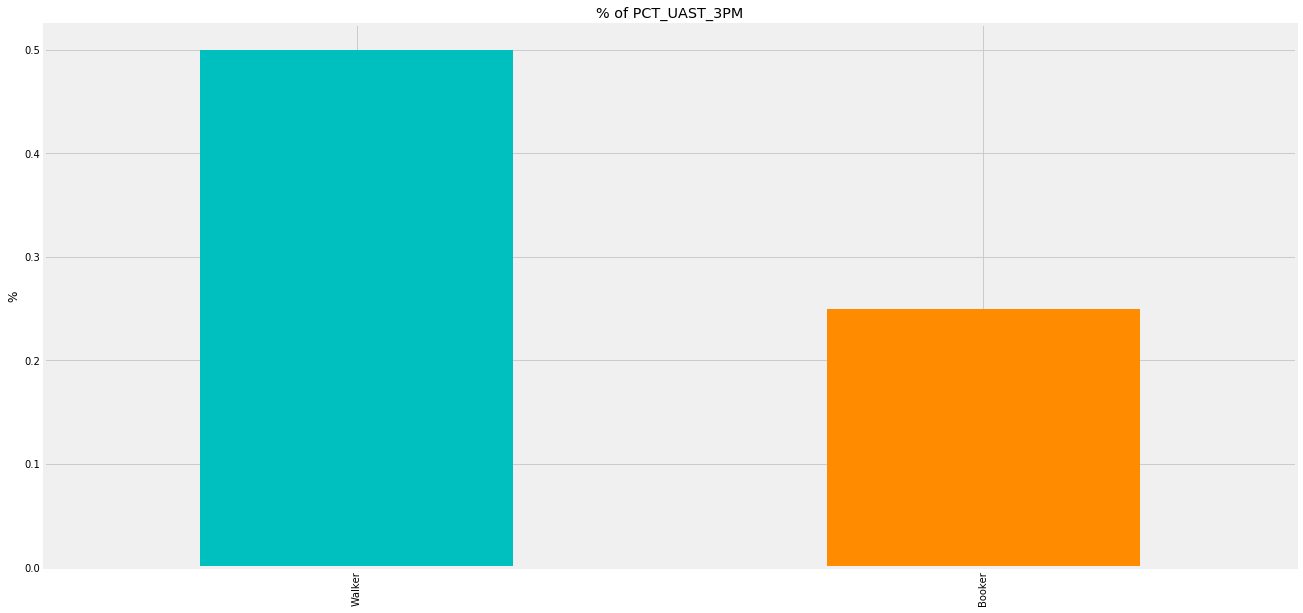

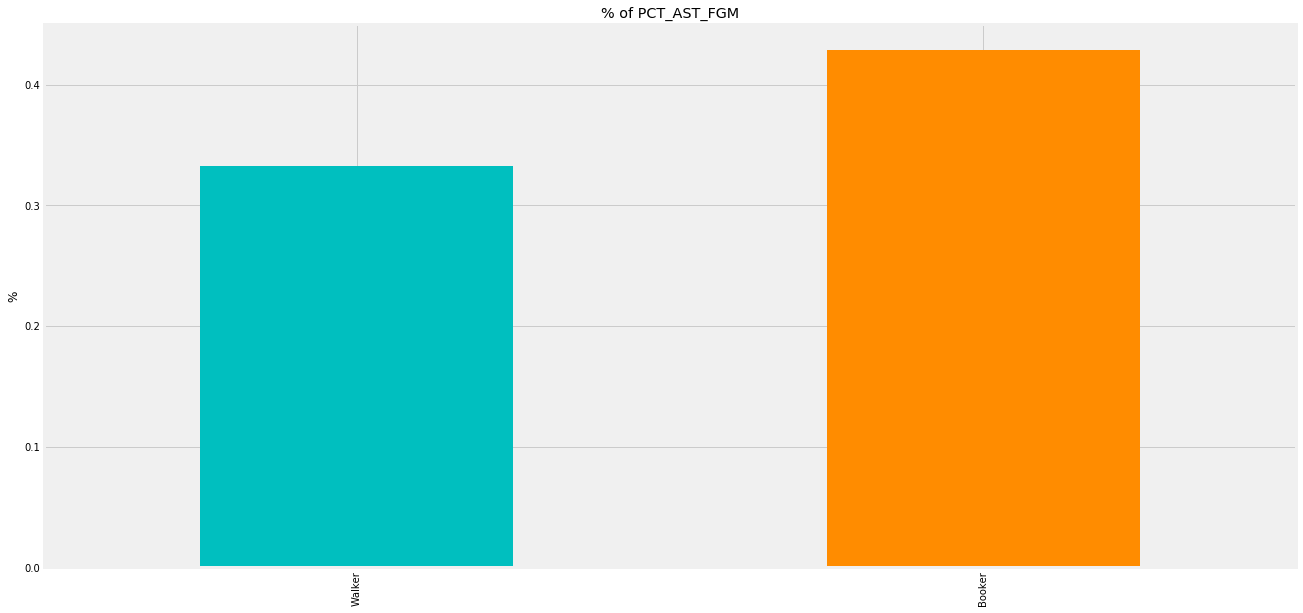

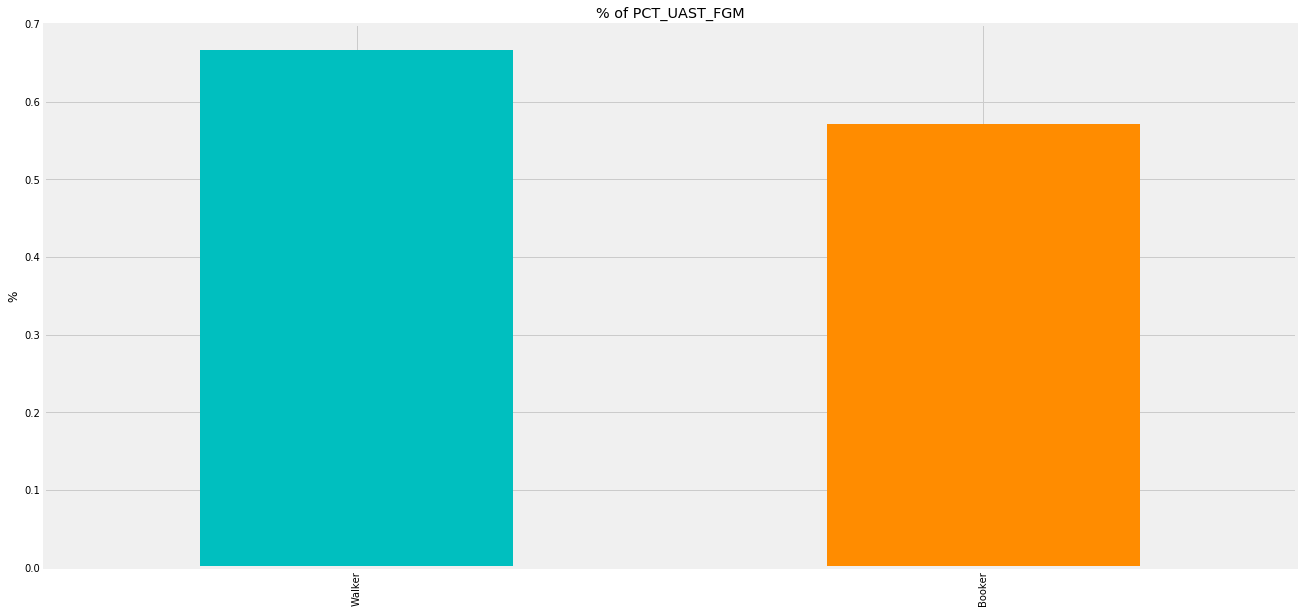

In [31]:
for i in list(loser_shooting_df.iloc[:, 9:]):
    ax = loser_shooting_df.iloc[:, 9:].plot.bar(y=i, color=['c', 'darkorange'])
    ax.set_ylabel('%')
    ax.get_legend().remove()
    ax.set_title("%% of %s" % i)
    ax.set_xticklabels(['Walker', 'Booker'])

In [32]:
fantasy_df = pd.DataFrame()
for i in range(len(loser_gameids)):
    try:
        temp = infographicfanduelplayer.InfographicFanDuelPlayer(game_id=loser_gameids[i])
        temp = temp.get_data_frames()[0]
        temp = temp.loc[temp['PLAYER_NAME'] == losers_player_list[i]]
        fantasy_df = fantasy_df.append(temp)
    except:
        pass
fantasy_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,JERSEY_NUM,PLAYER_POSITION,LOCATION,FAN_DUEL_PTS,NBA_FANTASY_PTS,USG_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,202689,Kemba Walker,1610612766,Charlotte Hornets,CHA,15,G,Home,73.4,77.4,0.436,45.4,21,34,0.618,6,14,0.429,12,12,1.000,0,7,7,4,9,4,0,3,2,10,60,1
11,1626164,Devin Booker,1610612756,Phoenix Suns,PHX,1,G,Road,91.5,95.6,0.474,45.0,21,40,0.525,4,11,0.364,24,26,0.923,2,6,8,6,5,3,1,1,3,16,70,-6


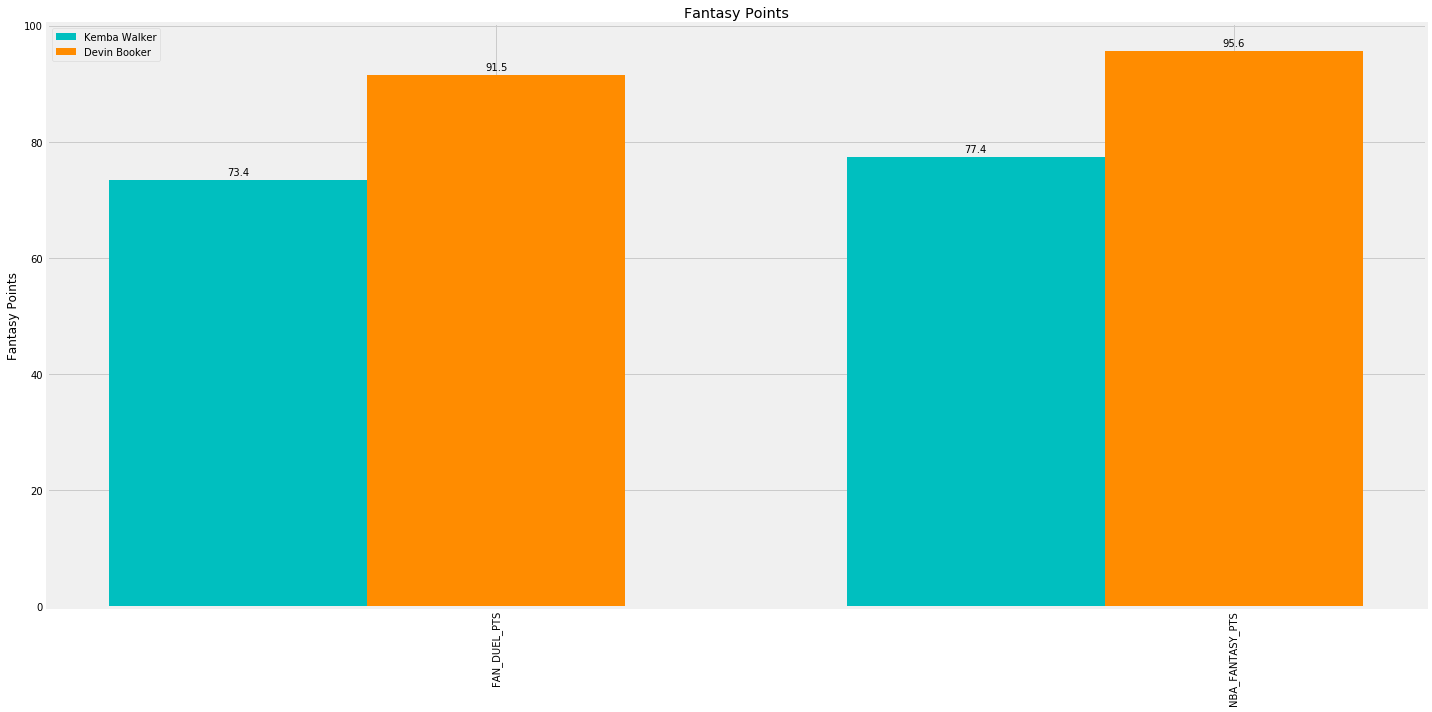

In [33]:
plt.rcParams["figure.figsize"] = (20,10)

labels = list(fantasy_df.iloc[:, [8,9]].columns)
walker_stats = fantasy_df.iloc[0, [8,9]].tolist()
booker_stats = fantasy_df.iloc[1, [8,9]].tolist()

x = np.arange(len(labels))  # the label locations
width = .35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, walker_stats, width, label='Kemba Walker', align = 'center', color = 'c')
rects2 = ax.bar(x + width/2, booker_stats, width, label='Devin Booker', align = 'center', color = 'darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fantasy Points')
ax.set_title('Fantasy Points')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=90)
fig.tight_layout()
ax.legend()
ax.autoscale_view()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [34]:
track_df = pd.DataFrame()
for i in range(len(loser_gameids)):
    try:
        temp = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=loser_gameids[i])
        temp = temp.get_data_frames()[0]
        temp = temp.loc[temp['PLAYER_NAME'] == losers_player_list[i]]
        track_df = track_df.append(temp)
    except:
        pass
track_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,DIST,ORBC,DRBC,RBC,TCHS,SAST,FTAST,PASS,AST,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
15,0021800225,1610612766,CHA,Charlotte,202689,Kemba Walker,G,,45:23,4.26,3.52,5,9,14,107,1,1,56,4,8,14,0.571,13,20,0.65,0.618,3,3,1.000
3,0021601076,1610612756,PHX,Phoenix,1626164,Devin Booker,G,,44:58,4.14,3.10,4,10,14,98,1,1,41,6,12,22,0.545,9,18,0.50,0.525,4,6,0.667


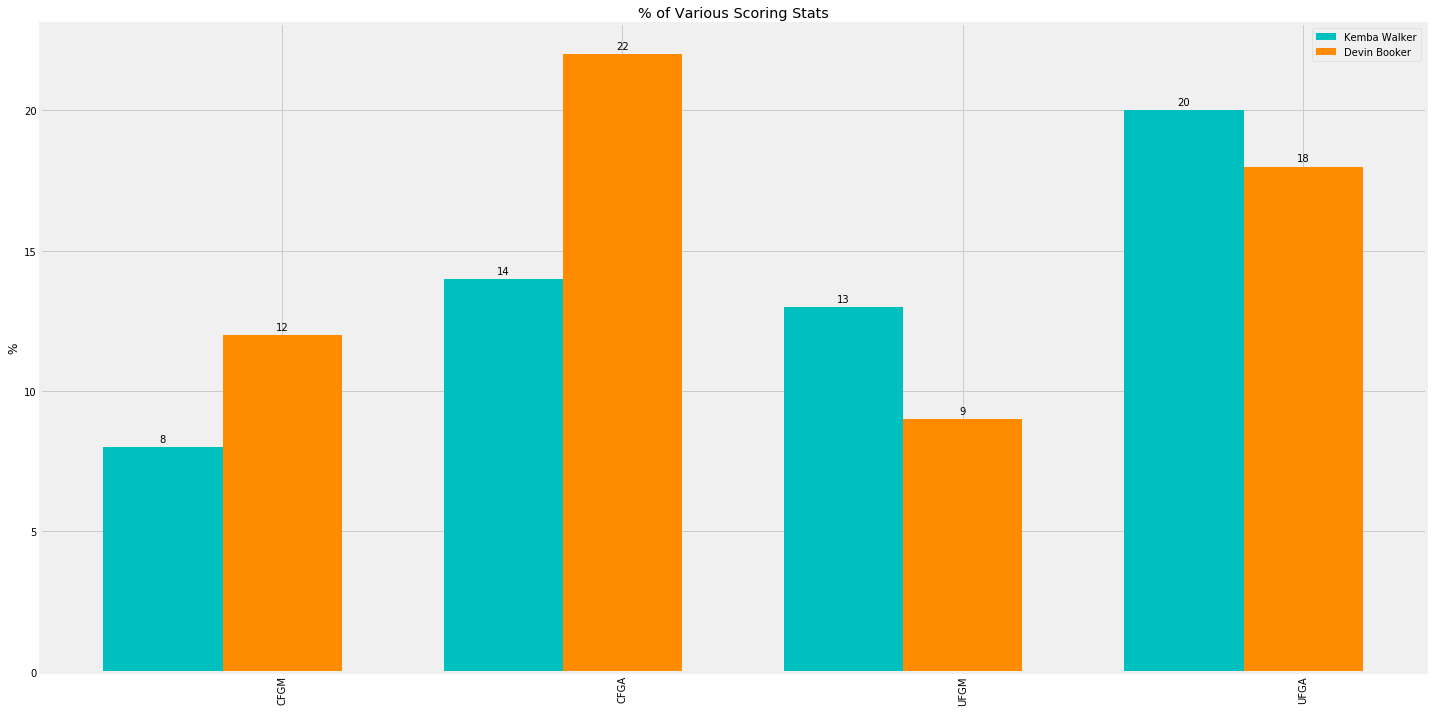

In [35]:
#https://matplotlib.org/3.1.0/gallery/units/bar_unit_demo.html
plt.rcParams["figure.figsize"] = (20,10)

labels = list(track_df.iloc[:, [19,20,22,23]].columns)
walker_stats = track_df.iloc[0, [19,20,22,23]].tolist()
booker_stats = track_df.iloc[1, [19,20,22,23]].tolist()

x = np.arange(len(labels))  # the label locations
width = .35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, walker_stats, width, label='Kemba Walker', align = 'center', color = 'c')
rects2 = ax.bar(x + width/2, booker_stats, width, label='Devin Booker', align = 'center', color = 'darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Various Scoring Stats')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=90)
fig.tight_layout()
ax.legend()
ax.autoscale_view()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

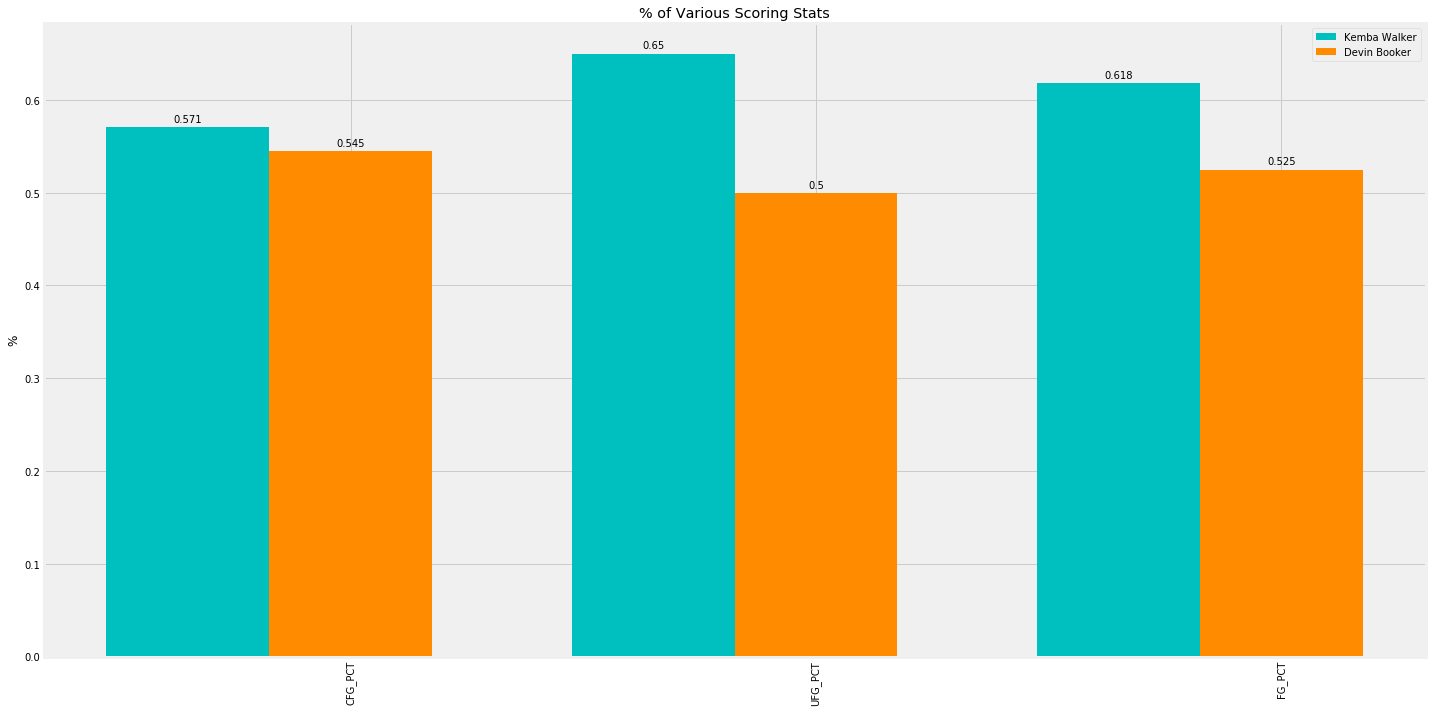

In [36]:
#https://matplotlib.org/3.1.0/gallery/units/bar_unit_demo.html
plt.rcParams["figure.figsize"] = (20,10)

labels = list(track_df.iloc[:, [21, 24, 25]].columns)
walker_stats = track_df.iloc[0, [21, 24, 25]].tolist()
booker_stats = track_df.iloc[1, [21, 24, 25]].tolist()

x = np.arange(len(labels))  # the label locations
width = .35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, walker_stats, width, label='Kemba Walker', align = 'center', color = 'c')
rects2 = ax.bar(x + width/2, booker_stats, width, label='Devin Booker', align = 'center', color = 'darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Various Scoring Stats')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels, rotation=90)
fig.tight_layout()
ax.legend()
ax.autoscale_view()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()